In [1]:
import pandas as pd
survey = pd.read_csv('survey_설문지.csv')
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


#전처리

In [2]:
survey= survey.dropna()

In [3]:
# 영어 없애기
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"", regex=True)  #regex
#소괄호와 소괄호 안의 내용 통째로 없애기
survey['comment'] = survey['comment'].str.replace('\(.+?\)',"", regex=True)

<ipython-input-3-9cc49167322d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"", regex=True)  #regex
<ipython-input-3-9cc49167322d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['comment'] = survey['comment'].str.replace('\(.+?\)',"", regex=True)


In [4]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [5]:
survey['length'] = survey['comment'].str.len()

<ipython-input-5-d6fe5e5aa77b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey['length'] = survey['comment'].str.len()


(array([20., 19., 20., 10.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

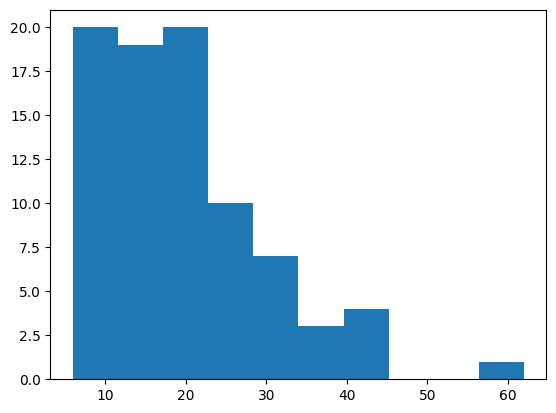

In [6]:
import matplotlib.pyplot as plt
plt.hist(survey['length'])

# 형태소 분석
- 자연어 처리에서 기본적으로 진행되는 부분
- 형태소 : 뜻을 가진 가장 작은 말의 단위
- 문장들에 대해서 형태소로 나눠서 단위 쪼개는 과정 -> 토큰화
- ex) 비가 참 많이 온다 를 음절로 나누게 되면 비 가 참 많 이 온 다
- 의미가 있는 형태소로 나누게 되면 비가 참 많이 온다
- 형태소로 나누는 이유는 ?
- 문장의 의미를 가장 잘 나타내는 형태소로 나눠서 문장을 쪼개도 그 의미는 변하지 않게 한다.
- 조사의 경우 문장의 의미 파악에 도움이 되지 않아서 삭제 => 불용어처리

In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 37.6 MB/s eta 0:00:00


In [9]:
from konlpy.tag import Okt
from konlpy.tag import Twitter

In [10]:
twt = Twitter()
text = '날씨가 화창하니 소풍가기에 좋다!'
tagging = twt.pos(text)
tagging

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('날씨', 'Noun'),
 ('가', 'Josa'),
 ('화창하니', 'Adjective'),
 ('소풍', 'Noun'),
 ('가기', 'Noun'),
 ('에', 'Josa'),
 ('좋다', 'Adjective'),
 ('!', 'Punctuation')]

In [12]:
# 조사 리스트 모음
all_words = []
parts= ['Josa']
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr =[]
    for n in words:
        if n =='EOS' or n =='':continue
        words_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        words_arr.append(words_tmp)
    all_words.extend(words_arr)
print(all_words)

['에', '이', '가', '이', '에', '가', '은', '한', '가', '가', '이', '이', '가', '를', '가', '이', '에', '이', '까지', '가', '를', '를', '이', '가', '이', '를', '을', '가', '이', '가', '이다', '을', '든', '에', '이', '가', '이다', '에', '를', '가', '하고', '의', '이', '의', '을', '가', '로', '가', '이', '에', '이', '가', '을', '이', '을', '이', '의', '가', '가', '에서는', '를', '고', '에', '이', '가', '에', '가', '를', '의', '을', '이', '가', '한', '가', '에', '이', '가', '의', '은', '가', '를', '의', '이', '하고', '가', '의', '은', '이', '에', '을', '가', '과', '를', '이', '에', '을', '의', '로', '을', '에', '이', '는', '이', '가', '를', '하고', '에', '가', '에', '가', '에', '를', '에', '가', '도', '를', '의', '가', '에', '를', '이', '이', '로', '가', '이', '가', '은', '에', '로', '가', '의', '이', '이', '이', '이라서', '에서도', '를', '에', '가', '을', '에', '이']


In [16]:
# 명사인 형태소 리스
all_words = []
parts= ['Noun']
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr =[]
    for n in words:
        if n =='EOS' or n =='':continue
        words_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        words_arr.append(words_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

In [17]:
#카운팅
all_words_df = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})
all_words_df.groupby('words').sum()
words_df1= all_words_df.groupby('words').sum()
words_df1.head(30)

,count
words,
가로수,3
강,1
거리,1
걱정,1
걸,1
것,2
게,1
겨울철,1
경관,1


# 불용어처리
- 걸, 것, 게를 지워보자

In [18]:
stop_words=['걸','것','게']
all_words = []
parts= ['Noun']
satisfaction=[]
for i in range(len(survey)):
    text = survey['comment'].iloc[i]
    words = twt.pos(text)
    words_arr =[]
    for n in words:
        if n =='EOS' or n =='':continue
        words_tmp=n[0]
        part = n[1]
        if not (part in parts):continue
        if words_tmp in stop_words:continue
        words_arr.append(words_tmp)
        satisfaction.append(survey['satisfaction'].iloc[i])
    all_words.extend(words_arr)
print(all_words)

all_words_df_f = pd.DataFrame({'words':all_words, 'satisfaction':satisfaction,
                              'count':len(all_words)*[1]})

['역앞', '젊은이', '운동', '수', '장소', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공

In [20]:
all_words_df1 = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})
words_df2= all_words_df1.groupby('words').sum()
words_df2.head(30)

,count
words,
가로수,3
강,1
거리,1
걱정,1
겨울철,1
경관,1
경로,1
경찰,1
고령자,1


In [21]:
all_words_df_f

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,수,5,1
4,장소,5,1
...,...,...,...
274,놀이기구,1,1
275,공원,2,1
276,더,2,1
277,역앞,1,1


# 만족도 점수가 높은 경우는 어떤 게 있을까?

In [22]:
all_words_df_f.groupby('words').sum()['satisfaction']

words
가로수     5
강       3
거리      5
걱정      2
겨울철     1
       ..
확인      5
확장      1
활기      4
활동     10
활성화     1
Name: satisfaction, Length: 184, dtype: int64

In [23]:
##점수에 대한 평균을 만들어 보기
words_sf = all_words_df_f.groupby('words').mean()['satisfaction']
words_count = all_words_df_f.groupby('words').sum()['count']
words_df = pd.concat([words_sf,words_count],axis=1)

In [24]:
#빈도가 많은 것은?
words_df =words_df[words_df['count']>3]
words_df

,satisfaction,count
words,,
공원,2.200000,5
관공서,3.500000,4
길이,3.500000,4
더,2.285714,14
상가,2.200000,5
수,4.142857,7
시,2.750000,4
역앞,1.200000,5
장소,3.000000,6


In [25]:
parts =['Noun']
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey['comment'].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i =='EOS' or i =='':continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts):continue
        words_df[word_tmp]=[1] #형태소로 나눈 것들은 다 1로 넣어 달라는 것
    all_words_df = pd.concat([all_words_df, words_df],ignore_index =True)
all_words_df

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
80,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
all_words_df1 = all_words_df.fillna(0)
all_words_df1

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 코사인 유사도를 측정해서 유사한 리뷰를 찾아보자

In [27]:
survey = survey.dropna()
target_text =all_words_df1.iloc[1]
target_text

역앞      0.0
젊은이     0.0
운동      1.0
수       1.0
장소      1.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 1, Length: 187, dtype: float64

In [28]:
import numpy as np
cos_sim=[]
for i in range(len(all_words_df1)):
    cos_text = all_words_df1.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text))
    cos_sim.append(cos)

all_words_df1['cos_sim'] = cos_sim

In [29]:
all_words_df1

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000
80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.204124
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
all_words_df1.sort_values('cos_sim',ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
36,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
41,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553
49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288675
